In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [5]:
df = pd.read_csv("./database.csv" , index_col=False)
print(df.head(5))
print(df.shape)

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
(569, 6)


In [6]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [13]:
print(df.groupby('diagnosis').size())

diagnosis
0    569
dtype: int64


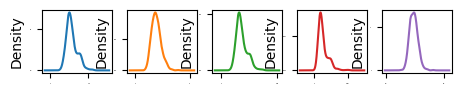

In [14]:
df.plot(kind='density', subplots=True, layout=(5,6), sharex=False, legend=False, fontsize=1)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12444\3636621480.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12444\3636621480.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)


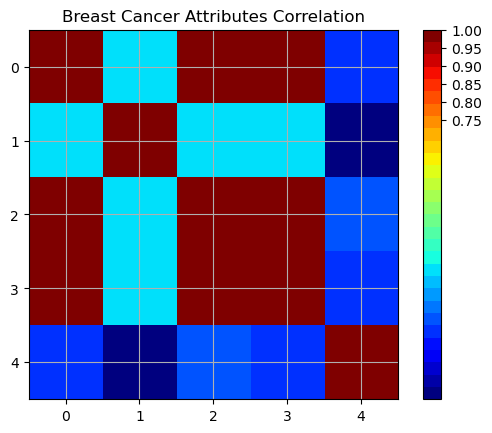

'\nIt is good to check the correlations between the attributes. From the output graph below,\nThe red around the diagonal suggests that attributes are correlated with each other. \n'

In [17]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()
'''
It is good to check the correlations between the attributes. From the output graph below,
The red around the diagonal suggests that attributes are correlated with each other. 
'''

In [18]:
Y = df['diagnosis'].values
print(type(Y))
print(Y.shape)
X = df.drop(['diagnosis'] , axis = 1).values
print(X.shape)

X_train , X_test , Y_train , Y_test  = train_test_split(X , Y , test_size = 0.2 , random_state = 15)

<class 'numpy.ndarray'>
(569,)
(569, 5)


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer   #Using the dataset via scikitlearn.datasets
from sklearn.model_selection import train_test_split


In [42]:
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'],['target']))

In [43]:
x = df_cancer.drop(['target'],axis =1)
y= df_cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(x_train, y_train)
y_predict =logistic_model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:

print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [48]:
#Training the data and splitting
x = df_cancer.drop(['target'],axis =1)
y= df_cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(x_train, y_train)
y_predict =logistic_model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)

print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have your data properly loaded and split as x_train, y_train, x_test, y_test

# Standardize features (scaling) - optional but often recommended for KNN
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_predict = knn_model.predict(x_test)

# Calculate confusion matrix and print classification report
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [58]:
from sklearn.metrics import accuracy_score
import numpy as np

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)


The best accuracy was with 0.9649122807017544 with k= 4


In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model.fit(x_train, y_train)
y_predict =svm_model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)


In [62]:
min_train =x_train.min()
range_train =(x_train - min_train).max()
x_train_scaled =(x_train-min_train)/range_train




In [63]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 


0.9646655000673039

In [65]:
from sklearn.metrics import jaccard_score

# Assuming you have already made predictions and stored them in yhat
jaccard_similarity = jaccard_score(y_test, yhat)

print("Jaccard Similarity Score:", jaccard_similarity)


Jaccard Similarity Score: 0.9428571428571428
